In [1]:
import sys
print(sys.executable)

C:\Users\Rasheeda_Banu\anaconda3\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator


In [3]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
import keras.backend as K
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
import os
#path = r'C:\Praxis\Term 3\CATS_DOGS_LIGHT (1)'
path = r'C:\Praxis\Term 3\CATS_DOGS_LIGHT (1)'
os.chdir(path)

### Data Augmentation 


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

In [5]:
datagen = ImageDataGenerator(
      rotation_range=45, width_shift_range=0.2,
      height_shift_range=0.2, shear_range=0.2,
      zoom_range=0.2, horizontal_flip=True)

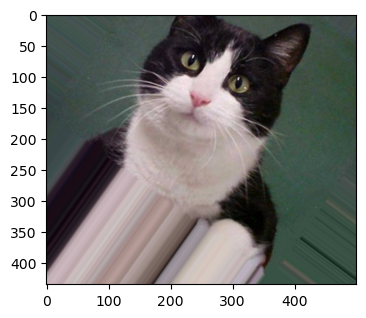

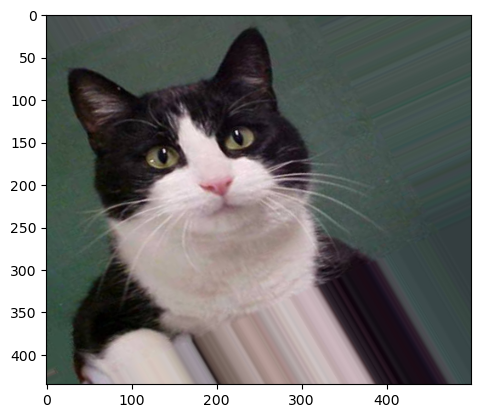

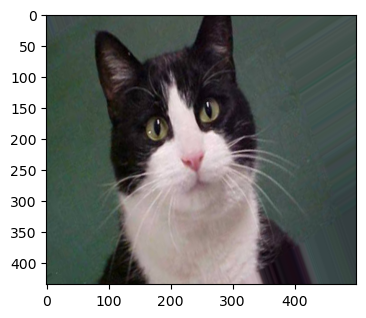

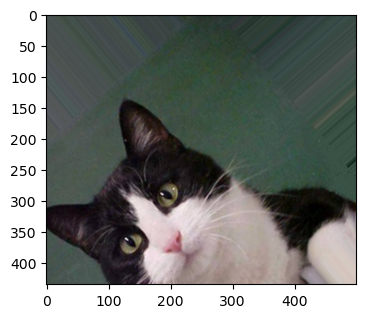

In [8]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image
img = image.load_img('C:\Praxis\Term 3\CATS_DOGS_LIGHT (1)\CATS_DOGS_LIGHT\single_prediction\cat_or_dog_3.jpg')  
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.imshow(img)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i, figsize=(4,4))
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [9]:
# Initialising the CNN
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [13]:
# Fitting the CNN to the images
K.clear_session()

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory('C:\\Praxis\\Term 3\\CATS_DOGS_LIGHT (1)\\CATS_DOGS_LIGHT\\train',
                        target_size = (64, 64),batch_size = 32, class_mode = 'binary')

test_gen = test_datagen.flow_from_directory('C:\\Praxis\\Term 3\\CATS_DOGS_LIGHT (1)\\CATS_DOGS_LIGHT\\test',
                        target_size = (64, 64), batch_size = 32, class_mode = 'binary', shuffle=False)

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [14]:
print(train_gen.class_indices)

{'CAT': 0, 'DOG': 1}


In [15]:
hist = classifier.fit(train_gen, epochs =10, validation_data = test_gen)

Epoch 1/10


32/32 [==============================] - 20s 537ms/step - loss: 0.7037 - accuracy: 0.5490 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 6s 175ms/step - loss: 0.6780 - accuracy: 0.5450 - val_loss: 0.6786 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 6s 201ms/step - loss: 0.6708 - accuracy: 0.5450 - val_loss: 0.6658 - val_accuracy: 0.5025
Epoch 4/10
32/32 [==============================] - 7s 212ms/step - loss: 0.6571 - accuracy: 0.5880 - val_loss: 0.7284 - val_accuracy: 0.5075
Epoch 5/10
32/32 [==============================] - 6s 199ms/step - loss: 0.6556 - accuracy: 0.5840 - val_loss: 0.6332 - val_accuracy: 0.6550
Epoch 6/10
32/32 [==============================] - 6s 189ms/step - loss: 0.6228 - accuracy: 0.6530 - val_loss: 0.6391 - val_accuracy: 0.6125
Epoch 7/10
32/32 [==============================] - 6s 192ms/step - loss: 0.6125 - accuracy: 0.6680 - val_loss: 0.6578 - val_accuracy: 0.5925
Epo

In [16]:
yt_prob = classifier.predict(test_gen)
yt_pred = np.where(yt_prob>=0.5,1,0)
y_test = test_gen.classes

13/13 [==============================] - 2s 123ms/step


In [17]:
confusion_matrix(y_test, yt_pred)

array([[116,  84],
       [ 36, 164]], dtype=int64)

In [18]:
accuracy_score(y_test, yt_pred)

0.7

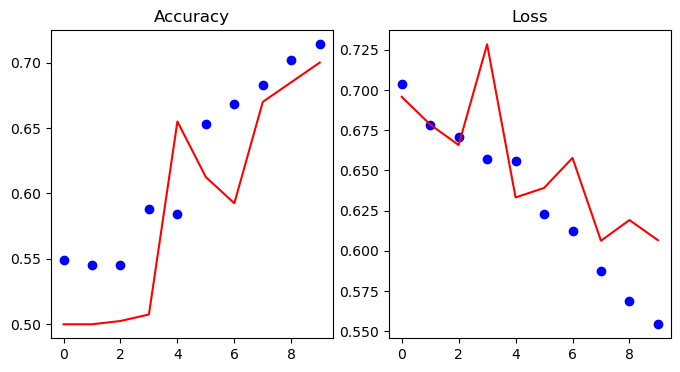

In [19]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'],'r')
plt.title('Loss')
plt.show()

#### Prediction of single image

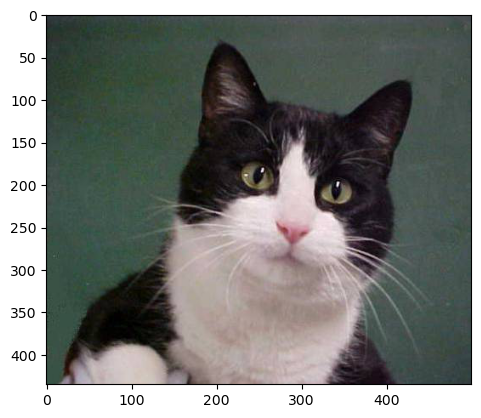

In [24]:
from tensorflow.keras.utils import load_img
test_image = load_img('C:\Praxis\Term 3\CATS_DOGS_LIGHT (1)\CATS_DOGS_LIGHT\single_prediction\cat_or_dog_3.jpg')
plt.imshow(test_image)
plt.show()

- We have given single image containing dog now lets make prediction on the same

In [21]:
train_gen.class_indices.keys()

dict_keys(['CAT', 'DOG'])

### Making new predictions


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('C:\Praxis\Term 3\CATS_DOGS_LIGHT (1)\CATS_DOGS_LIGHT\single_prediction\cat_or_dog_3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_gen.class_indices

if result[0][0] <= 0.5:
    prediction = 'cat'
else:
    prediction = 'dog'
    
print('Prediction: ', prediction)

1/1 [==============================] - 0s 49ms/step
Prediction:  cat


In [25]:
result

array([[0.]], dtype=float32)

### Our model has rightly predicted the image as Cat

##### Now we have given single image containing dog now lets make prediction on the same

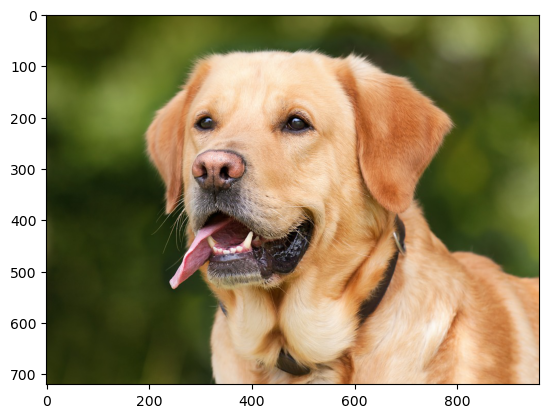

In [27]:
from tensorflow.keras.utils import load_img
test_image = load_img('C:\Praxis\Term 3\CATS_DOGS_LIGHT (1)\CATS_DOGS_LIGHT\single_prediction\cat_or_dog_1.jpg')
plt.imshow(test_image)
plt.show()

In [28]:
test_image = load_img('C:\Praxis\Term 3\CATS_DOGS_LIGHT (1)\CATS_DOGS_LIGHT\single_prediction\cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_gen.class_indices

if result[0][0] <= 0.5:
    prediction = 'cat'
else:
    prediction = 'dog'
    
print('Prediction: ', prediction)

1/1 [==============================] - 0s 55ms/step
Prediction:  dog


#### Our model has rightly predicted the image as Dog¶

### VGG16

In [29]:
import glob as glob
import cv2

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [31]:
K.clear_session()
img_size=224
input_shape = (img_size, img_size, 3)
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_gen = train_datagen.flow_from_directory('C:\\Praxis\\Term 3\\CATS_DOGS_LIGHT (1)\\CATS_DOGS_LIGHT\\train',
                        target_size = (img_size, img_size),batch_size = 32, class_mode = 'binary')
test_gen = test_datagen.flow_from_directory('C:\\Praxis\\Term 3\\CATS_DOGS_LIGHT (1)\\CATS_DOGS_LIGHT\\test',
                        target_size = (img_size, img_size), batch_size = 32, class_mode = 'binary', shuffle=False)

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [32]:
# set up transfer learning on pre-trained ImageNet VGG16 model - remove fully connected layer and replace

vgg16_model = VGG16(weights = 'imagenet', include_top = False,input_shape=input_shape)
for layer in vgg16_model.layers:
    layer.trainable = False
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation = 'sigmoid')(x)
model = Model(vgg16_model.input, predictions)

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [36]:
# Compile the new model using a Adam optimizer
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# evaluate the performance the new model and report the results
score = model.evaluate(test_gen)
print("Test Accuracy:", score[1])

In [37]:
# Fit the model, log the results and the training time
hist = model.fit(train_gen, epochs = 10, validation_data = test_gen)

Epoch 1/10
32/32 [==============================] - 205s 6s/step - loss: 0.3798 - accuracy: 0.8160 - val_loss: 0.3427 - val_accuracy: 0.8425
Epoch 2/10
32/32 [==============================] - 198s 6s/step - loss: 0.2804 - accuracy: 0.8990 - val_loss: 0.2926 - val_accuracy: 0.8675
Epoch 3/10
32/32 [==============================] - 186s 6s/step - loss: 0.2648 - accuracy: 0.8930 - val_loss: 0.2341 - val_accuracy: 0.9150
Epoch 4/10
32/32 [==============================] - 1900s 61s/step - loss: 0.2609 - accuracy: 0.8870 - val_loss: 0.2745 - val_accuracy: 0.8825
Epoch 5/10
32/32 [==============================] - 205s 6s/step - loss: 0.2285 - accuracy: 0.9070 - val_loss: 0.2336 - val_accuracy: 0.9100
Epoch 6/10
32/32 [==============================] - 226s 7s/step - loss: 0.2481 - accuracy: 0.8840 - val_loss: 0.2252 - val_accuracy: 0.9075
Epoch 7/10
32/32 [==============================] - 203s 6s/step - loss: 0.2156 - accuracy: 0.9080 - val_loss: 0.2143 - val_accuracy: 0.9125
Epoch 8/10


In [39]:
yt_prob = model.predict(test_gen)
yt_pred = np.where(yt_prob>=0.5,1,0)
y_test = test_gen.classes

13/13 [==============================] - 59s 5s/step


In [40]:
confusion_matrix(y_test, yt_pred)

array([[168,  32],
       [  9, 191]], dtype=int64)

In [41]:
accuracy_score(y_test, yt_pred)

0.8975

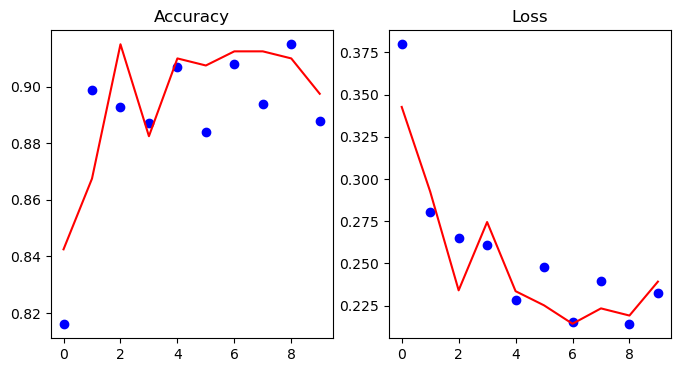

In [42]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'],'r')
plt.title('Loss')
plt.show()

#### Making predictions

In [47]:
test_image = load_img('C:\Praxis\Term 3\CATS_DOGS_LIGHT (1)\CATS_DOGS_LIGHT\single_prediction\cat_or_dog_1.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print('Prediction: ', prediction)

1/1 [==============================] - 0s 267ms/step
Prediction:  dog


In [48]:
result

array([[1.]], dtype=float32)

### ResNet

In [49]:
from keras import applications

In [50]:
from keras.applications.resnet import ResNet50

In [51]:
img_height,img_width = 224, 224 
base_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [52]:
K.clear_session()

x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation= 'sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [54]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(train_gen, epochs = 5, validation_data = test_gen)

In [ ]:
# evaluate the performance the new model and report the results
score = model.evaluate(test_gen)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
yt_prob = model.predict(test_gen)
yt_pred = np.where(yt_prob>=0.5,1,0)
y_test = test_gen.classes

In [ ]:
confusion_matrix(y_test, yt_pred)

In [ ]:
accuracy_score(y_test, yt_pred)

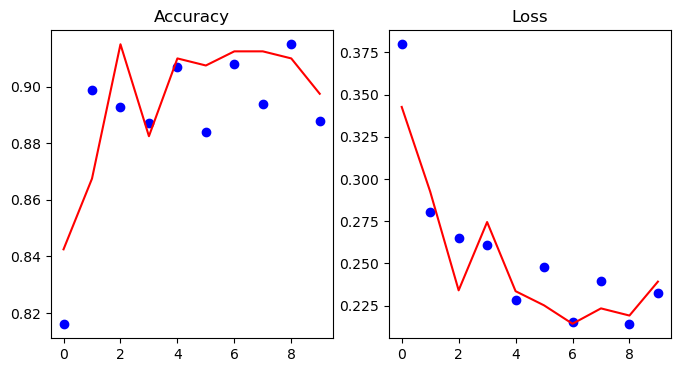

In [55]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'],'r')
plt.title('Loss')
plt.show()